<h1>3ª Etapa do Processo Seletivo</h1>
Esta apresentação foi criada por <b>Alan Pereira de Sá</b>. Aqui irei realizar algumas analises sobre os dados da base de dados enviada.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import roman
plt.style.use('ggplot')

In [2]:
xlsx = pd.ExcelFile('base_de_dados.xlsx')
dataset = pd.read_excel(xlsx, '3ªEtapa')
dataset = dataset.dropna()

<h2>Relação entre a quantidade de processos com a agencia:</h2>

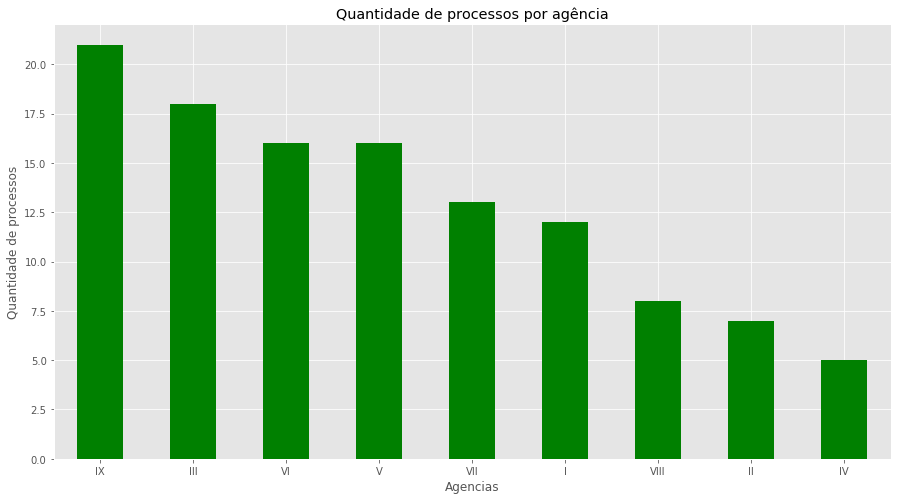

In [3]:
dataset['Agencia'].value_counts().plot(kind='bar', figsize=(15,8), rot=0,color='green')

plt.title('Quantidade de processos por agência')
plt.xlabel('Agencias')
plt.ylabel('Quantidade de processos')
plt.show()

<h2>Relação entre a quantidade de processos com o ano:</h2>

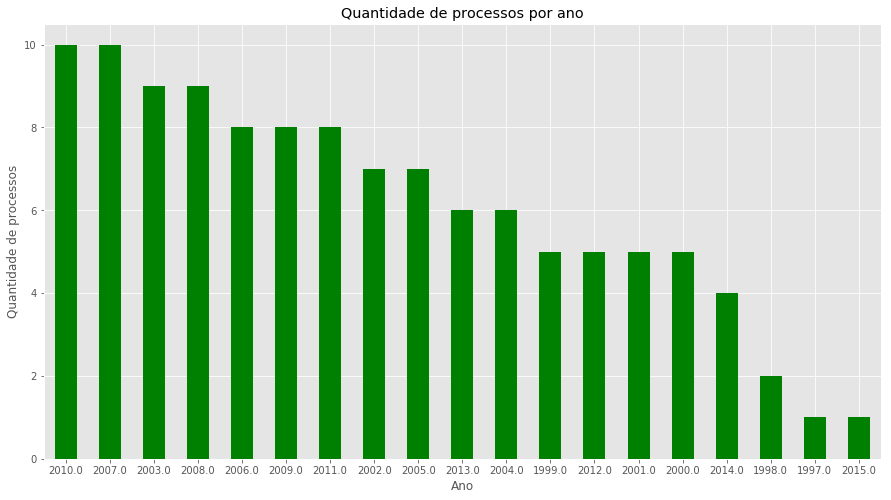

In [4]:
dataset['Exercicio_Apurado'].value_counts().plot(kind='bar', figsize=(15,8), rot=0,color='green')

plt.title('Quantidade de processos por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de processos')
plt.show()

<h2>Relação entre a quantidade de processos com a agência em cada ano:</h2>

In [5]:
ano =  dataset.Exercicio_Apurado.unique()
processos_ano = {}
for x in ano:
    processos_ano[x] = len(dataset[dataset['Exercicio_Apurado'] == x])

qnt_processos_anos = []
for x in processos_ano:
    qnt_processos_anos.append(processos_ano[x])

df = pd.DataFrame({'Anos':anos, 'Processos':qnt_processos_anos})
sns.lineplot(data=df, x='Anos', y='Processos')


NameError: name 'anos' is not defined

<h2>Relação entre a quantidade de processos com o relator:</h2>

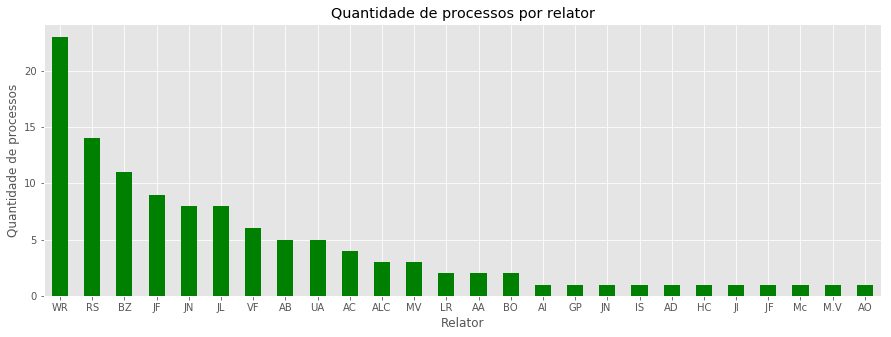

In [6]:
dataset['Relator'].value_counts().plot(kind='bar', figsize=(15,5), rot=0,color='green')

plt.title('Quantidade de processos por relator')
plt.xlabel('Relator')
plt.ylabel('Quantidade de processos')
plt.show()


<h2>Relação entre a quantidade de processos com a quantidade de relatores:</h2>

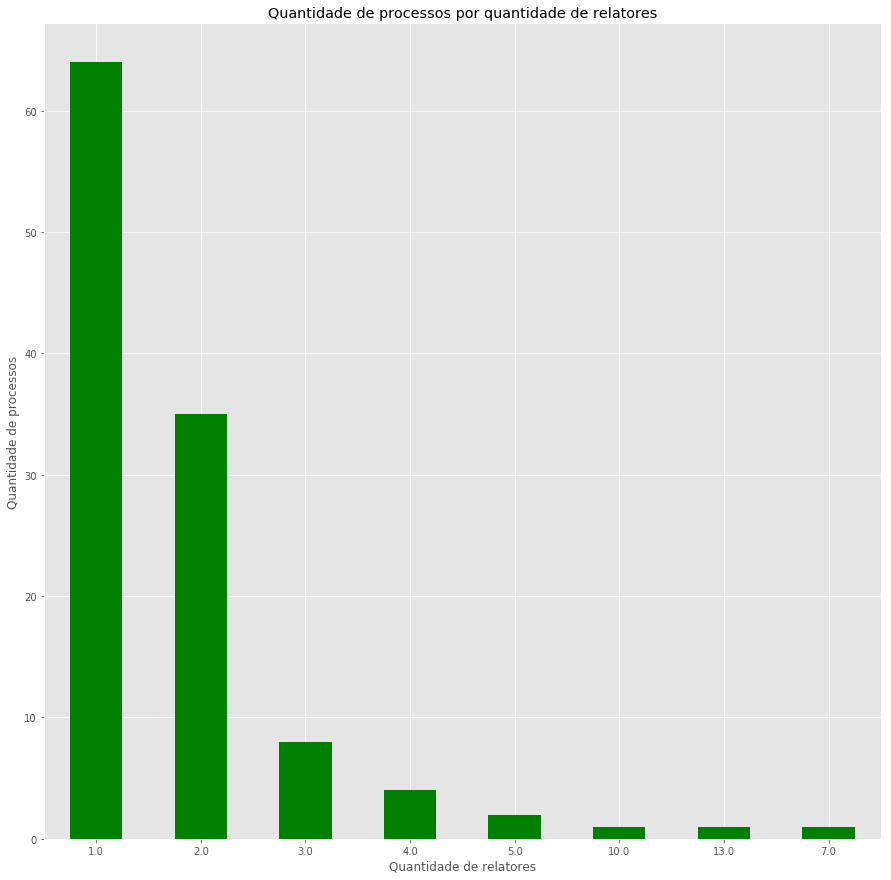

In [7]:
dataset['Quantidade_Relatores'].value_counts().plot(kind='bar', figsize=(15,15), rot=0,color='green')

plt.title('Quantidade de processos por quantidade de relatores')
plt.xlabel('Quantidade de relatores')
plt.ylabel('Quantidade de processos')
plt.show()


<h2>Relação entre a quantidade de processos com a unidade técnica:</h2>

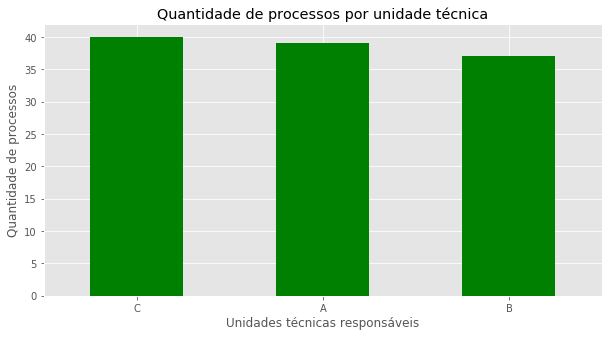

In [8]:
dataset['Unidade_Tecnica_Responsavel'].value_counts().plot(kind='bar', figsize=(10,5), rot=0,color='green')

plt.title('Quantidade de processos por unidade técnica')
plt.xlabel('Unidades técnicas responsáveis')
plt.ylabel('Quantidade de processos')
plt.show()


<h1>Média de duração por agência e geral</h1>

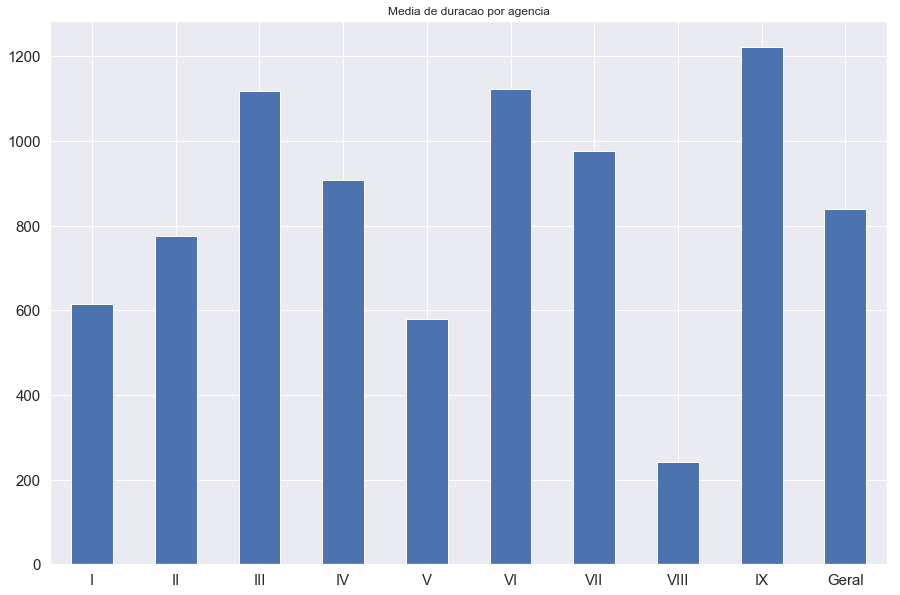

In [9]:
dataset['AgenciaInt'] = dataset['Agencia'].apply(lambda x: roman.fromRoman(x))
rm = ['N/D','N/A']
dataset = dataset[~dataset['Data_Encerramento'].isin(rm)]
dataset['Tempo_Duracao'] = pd.to_numeric(dataset['Data_Encerramento']) -  pd.to_numeric(dataset['Data_Autuacao'])
d = dataset.groupby(['AgenciaInt']).mean()
m = d['Tempo_Duracao']
m = pd.Series(m.index.values, index=m)
m = m.apply(roman.toRoman)
m = pd.Series(m.index.values, index=m)
m = m.append(pd.Series([m.mean()], index=['Geral']))
sns.set()
m.plot(kind='bar', title='Media de duracao por agencia', fontsize=15,rot=0,figsize=(15,10))
plt.show()

<h2>Quantidade responsaveis x Agencia</h2>